In [1]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# BID

In [2]:
bid = pd.read_csv('ACB_2015.csv')

In [3]:
# bid = bid.loc[751:].reset_index()

<AxesSubplot:>

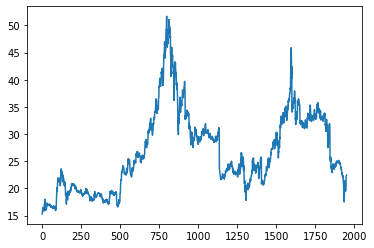

In [4]:
bid['close'].plot()

ADF Statistic: -1.999819
p-value: 0.286652
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
ADF Statistic: -16.569687
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
ADF Statistic: -16.514013
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


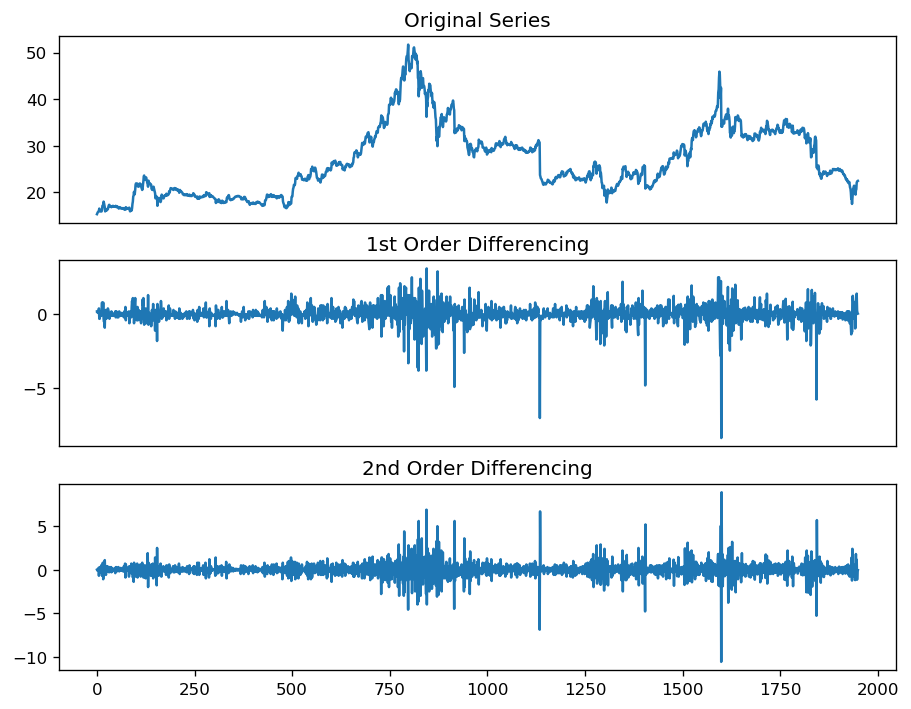

In [5]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
data = np.reshape(bid['close'].values,(-1))

# mean = np.mean(data)

# std = np.std(data)

# def de(x):
#     return x*std + mean

# data = (data - np.mean(data)) / np.std(data)

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
# 1st Differencing
ax2.plot(np.diff(data,1)); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
result = adfuller(np.diff(data,1))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
# 2nd Differencing
ax3.plot(np.diff(data,2)); ax3.set_title('2nd Order Differencing')
result = adfuller(np.diff(data,2))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
plt.show()

### From figures, choose d=1 or d=2

/home/dh2409/miniconda3/envs/pDL/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


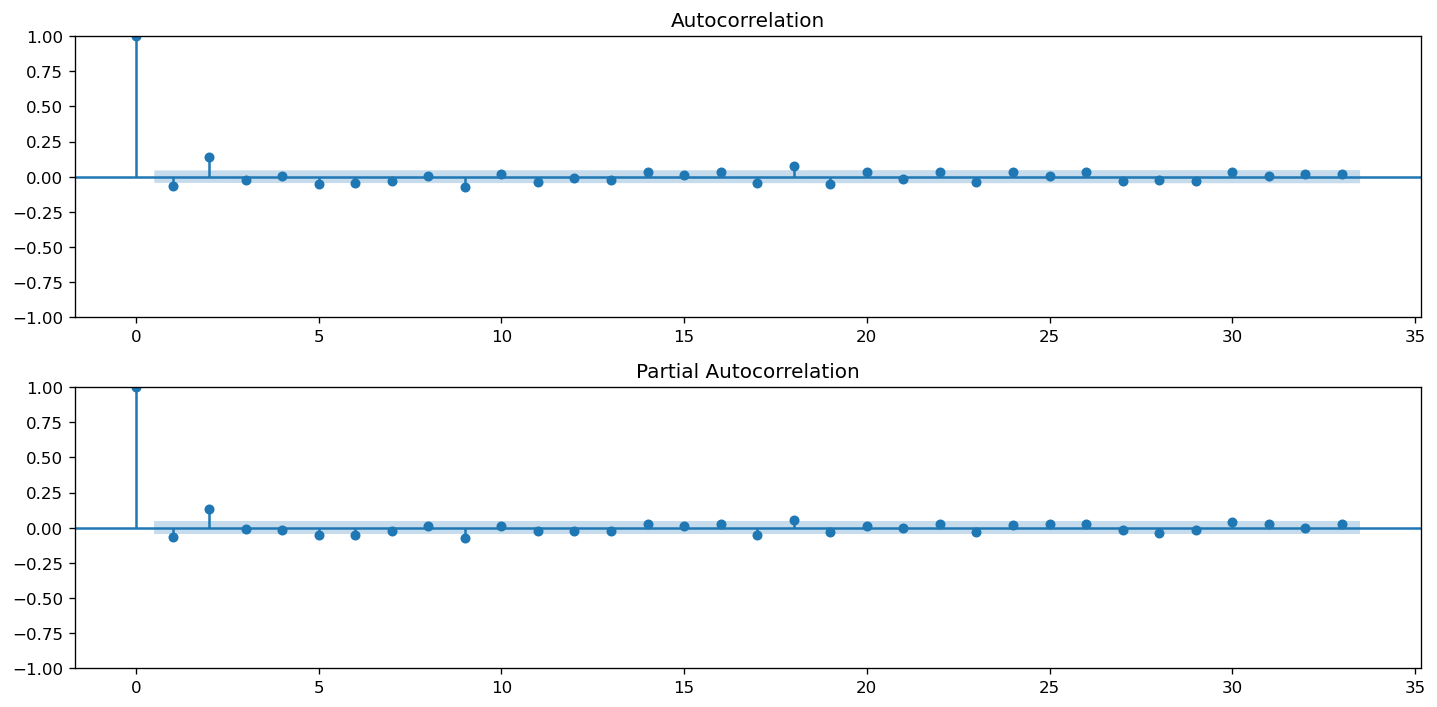

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax1 = plt.subplots(2, figsize=(12,6))
plot_acf(np.diff(data,1), ax=ax1[0])
plot_pacf(np.diff(data,1), ax=ax1[1])
plt.tight_layout()
plt.show()

/home/dh2409/miniconda3/envs/pDL/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


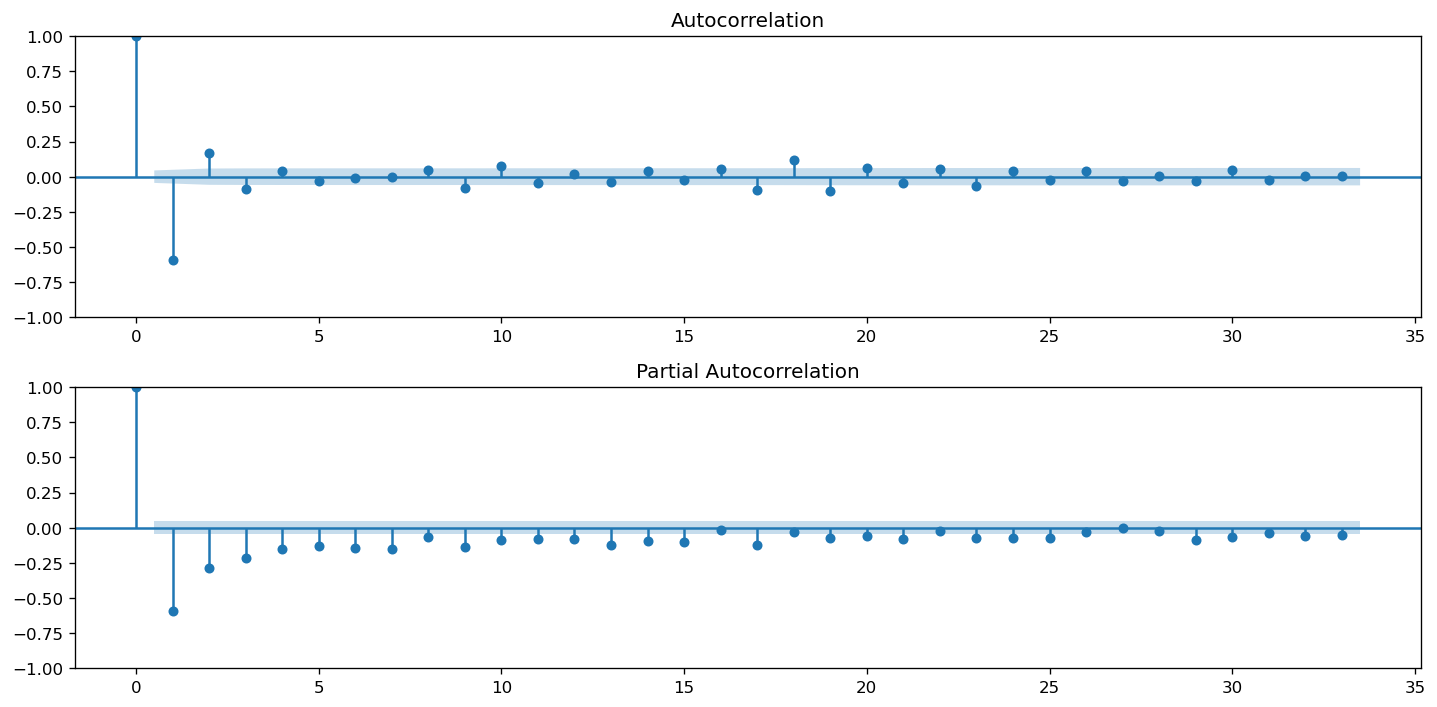

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax1 = plt.subplots(2, figsize=(12,6))
plot_acf(np.diff(np.diff(data,1),1), ax=ax1[0])
plot_pacf(np.diff(np.diff(data,1),1), ax=ax1[1])
plt.tight_layout()
plt.show()

In [8]:
# # fit model
# train, test = train_test_split(data, test_size=0.2, shuffle=False)
# print(len(train))
# print(len(test))
# model = ARIMA(train, order=(7,2,0))
# model_fit = model.fit()
# # summary of fit model
# print(model_fit.summary())
# # line plot of residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# plt.show()
# # summary stats of residuals
# print(residuals.describe())

In [9]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# train, test = train_test_split(data, test_size=0.2, shuffle=False)

# history_close = [x for x in bid['close'].values.flatten()]
# history_open = [x for x in bid['open'].values.flatten()] 
# predictions_close = list()
# predictions_open = list()
# # walk-forward validation
# # for t in range(len(test)):
# #     model = ARIMA(history, order=(2,1,0))
# #     model_fit = model.fit()
# #     output = model_fit.forecast()
# #     yhat = output[0]
# #     predictions.append(yhat)
# #     obs = test[t]
# #     history.append(obs)
# for i in range(1):
#     model_close = ARIMA(history_close, order=(7,2,0))
#     model_open = ARIMA(history_open, order=(2,2,2))
#     model_close_fit = model_close.fit()
#     model_open_fit = model_open.fit()
#     output_close = model_close_fit.forecast()
#     output_open = model_open_fit.forecast()
#     yhat_close = output_close[0]
#     yhat_open = output_open[0]
# #     print('predicted=%f, expected=%f' % (yhat, obs))
#     print("open",yhat_open)
#     print("close",yhat_close)
#     history_close.append(yhat_close)
#     history_open.append(yhat_open)
# # evaluate forecasts
# # rmse = sqrt(mean_squared_error(test, predictions))
# # print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from math import sqrt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

train, test = train_test_split(data, test_size=0.1, shuffle=False)

d = [1,2]
p = [[1,2,3],[6,7,8]]
q = [[1,2,3],[1,2,3]]

df = pd.DataFrame(columns=["(p,d,q)","RMSE","MAPE","MAE"])

best_rmse = None
best_param = [0,0,0]

for i, _d in enumerate(d):
    for _p in p[i]:
        for _q in q[i]:       
            history= [x for x in train.flatten()]
            predictions = list()
            model = ARIMA(history, order=(_p,_d,_q))
            model_fit = model.fit()
#             ex = np.concatenate([[train[-1]], test[:-1]])
#             for j in range(len(test)):
#                 output = model_fit.forecast()
#                 yhat = output[0]
#                 predictions.append(yhat)
#                 obs = test[j]
# #                 print(obs)
#                 model_fit.append([obs],refit=False)
            predictions = model_fit.predict(params=(_p,_d,_q),start=len(train),end=len(train) + len(test) - 1, dynamic=True)
            rmse = sqrt(mean_squared_error(test, predictions))
            if best_rmse is None:
                best_rmse = rmse
                best_param[0] = _p
                best_param[1] = _d
                best_param[2] = _q
            elif best_rmse > rmse:
                best_rmse = rmse
                best_param[0] = _p
                best_param[1] = _d
                best_param[2] = _q
                
            mape = mean_absolute_percentage_error(test, predictions)
            mae = mean_absolute_error(test, predictions)
            df = df.append({"(p,d,q)" : f"({_p},{_d},{_q})", "RMSE": rmse, "MAPE": mape, "MAE": mae}, ignore_index=True)
#             print('Test RMSE: %.3f' % rmse)
#             print('Test MAPE: %.3f' % mape)
#             print('Test MAE: %.3f' % mae)

<ipython-input-39-8c88a09bb1ab>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"(p,d,q)" : f"({_p},{_d},{_q})", "RMSE": rmse, "MAPE": mape, "MAE": mae}, ignore_index=True)
<ipython-input-39-8c88a09bb1ab>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"(p,d,q)" : f"({_p},{_d},{_q})", "RMSE": rmse, "MAPE": mape, "MAE": mae}, ignore_index=True)
<ipython-input-39-8c88a09bb1ab>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"(p,d,q)" : f"({_p},{_d},{_q})", "RMSE": rmse, "MAPE": mape, "MAE": mae}, ignore_index=True)
<ipython-input-39-8c88a09bb1ab>:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [41]:
df

,"(p,d,q)",RMSE,MAPE,MAE
0,"(1,1,1)",7.134289,0.242638,5.735193
1,"(1,1,2)",7.069808,0.240708,5.693627
2,"(1,1,3)",7.173631,0.243983,5.766696
3,"(2,1,1)",7.073409,0.240809,5.695720
4,"(2,1,2)",7.073051,0.240799,5.695510
5,"(2,1,3)",7.188740,0.244434,5.776120
6,"(3,1,1)",7.073422,0.240810,5.695728
7,"(3,1,2)",7.200384,0.244792,5.783860
8,"(3,1,3)",7.212915,0.245179,5.792258
9,"(6,2,1)",8.190086,0.278553,6.579653


Best params [1, 1, 2]


[]

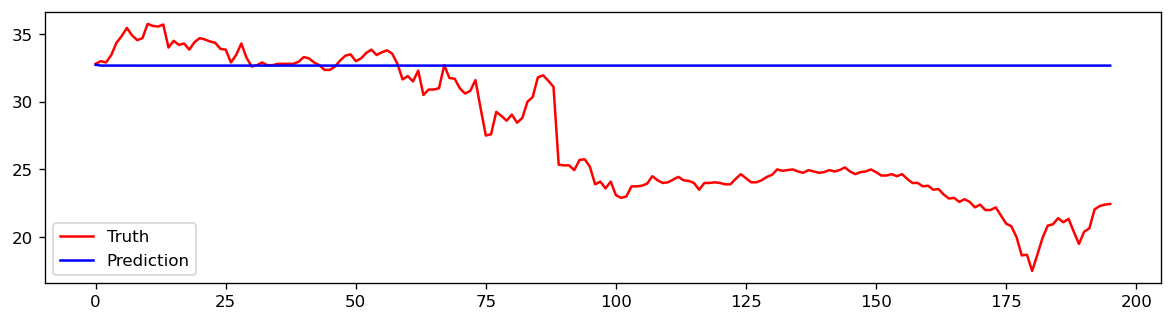

In [44]:
print("Best params", best_param)
history= [x for x in train.flatten()]
model = ARIMA(history, order=best_param)
model_fit = model.fit()
ex = np.concatenate([[train[-1]], test[:-1]])
predictions = model_fit.predict(params=best_param,start=len(train),end=len(train) + len(test) - 1, dynamic=True)
fig, ax = plt.subplots(1, figsize=(12,3))
ax.plot(test,color='r')
ax.plot(predictions, color='b')
ax.legend(labels=['Truth','Prediction'])
plt.plot()